Importing Libraries

In [41]:
import numpy as np #to get numpy arrays
import pandas as pd #to make dataframes
import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot graphs
from sklearn.model_selection import train_test_split #to split the data
from sklearn.ensemble import RandomForestRegressor #model used
from sklearn import metrics #to evaluate our model


Data Collection and Processing

In [4]:
#Loading csv dataset to pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print first 5 rows in the dataframe
gold_data.head()
#spx - stocks value, #gld - gold price, uso - US oil price, slv - silver price, EUR/USD - euros and usd currency rate

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
# getting some basic info about the data like datatype, non nulls etc
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [12]:
# getting the statistics of data
gold_data.describe()
#count - total count, mean, std deviation, min, % shows how much % is less than 25%/50%/75%, max

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation (directly proportional)
2. Negative Correlation (inversely proportional)

In [16]:
# Calculate the correlation matrix, excluding non-numeric columns like 'Date'
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

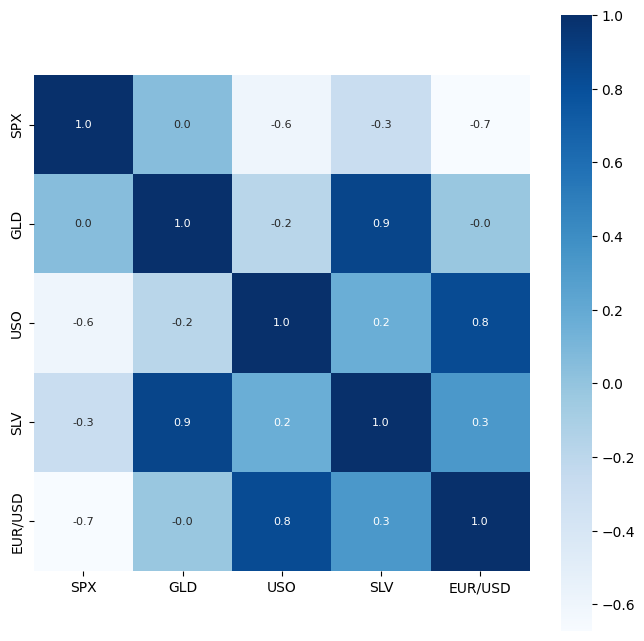

In [19]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
# fmt = 0.1f precision, annotation true/false, annot size and color

In [21]:
# correlation values of GLD
print(correlation['GLD']) #check positive/negative correlation wrt to GLD

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1771736525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

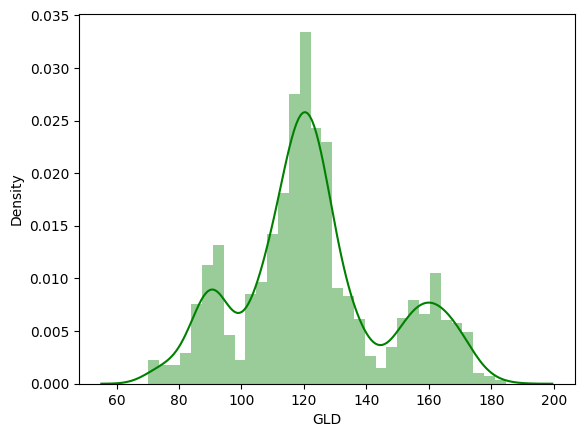

In [22]:
# checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [23]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2) #0.2 is 20%

#Model Training: Random Forest Regressor
It consists of n number of decision trees, then by Majority voting/Average output is determined.

In [30]:
model = RandomForestRegressor(n_estimators=100)

In [31]:
#training the model
model.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [32]:
#prediction on Test Data
test_data_prediction = model.predict(X_test)

In [33]:
print(test_data_prediction)

[168.39549929  81.93310001 116.09800009 127.75520062 120.61220145
 154.6969981  150.26599926 126.16340034 117.51149889 125.95920059
 116.68930127 171.90660079 141.56069861 167.84699803 115.19850002
 117.98220057 140.93350311 169.90540062 158.8542037  158.03059864
 155.15389977 125.4927008  176.51649922 157.02320317 125.25810062
  93.7792997   78.06309994 120.40670027 119.06489962 167.55780038
  88.21110062 125.22060019  91.09420088 117.59870061 121.10209879
 136.2656005  115.55540122 115.26200051 146.86609922 107.3876011
 104.34140244  87.21029793 126.46530066 117.79180018 152.29229936
 119.72829972 108.27999983 108.14809856  93.19640055 127.05289794
  74.83110053 113.70149933 121.33870009 111.33499905 118.91629926
 120.11779932 159.60930016 168.16800052 146.93459701  85.75059868
  94.23010045  86.88129876  90.5629998  118.9450006  126.40000092
 127.61520003 169.38350029 122.13659909 117.43039908  98.42630045
 168.39890155 142.79999884 132.24980284 121.16280203 120.75109949
 119.733400

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) #check the error_score - real vs predicted
print("R squared error: ",error_score) #use diff models or deep neural networks to get more better error_score

R squared error:  0.9890992648896163


Compare the Actual Values and Predicted Values in Plot

In [39]:
Y_test = list(Y_test) #convert it into list

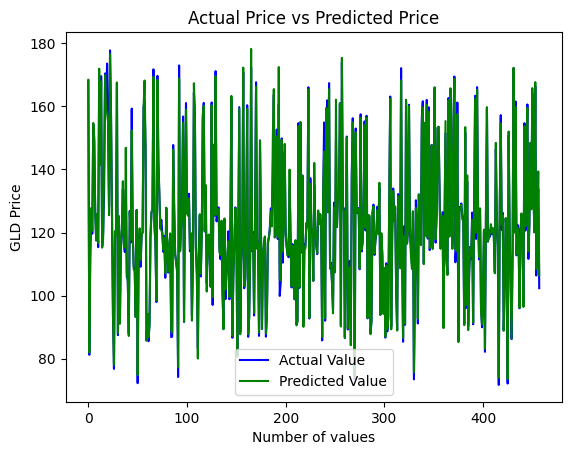

In [40]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()